# Utils

> Utility methods to load data

In [ ]:
#| default_exp utils

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import pandas as pd
from fastcore.utils import Path
from sklearn.model_selection import StratifiedKFold

# Dataset setup

In [ ]:
workdir=Path('../input')

In [ ]:
workdir.ls()

(#6) [Path('../input/jpeg-melanoma-256x256.zip'),Path('../input/sample_submission.csv'),Path('../input/test.csv'),Path('../input/test'),Path('../input/train.csv'),Path('../input/train')]

In [ ]:
# | export
def create_folds(workdir: Path = "input", n_splits: int = 5):
    """
    To separate the dataframe into stratified folds.
    """
    if isinstance(workdir, str): workdir=Path(workdir)
    df = pd.read_csv(workdir / "train.csv")
    X_names = df.columns[:-1].to_list()
    y_name = df.columns[-1]
    df["fold"] = -1
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
    for fold, (train_idx, val_idx) in enumerate(cv.split(df[X_names], df[y_name])):
        df["fold"].iloc[[val_idx]] = fold
    return df


Test if the create folds function works as expected.

In [ ]:
from sklearn.datasets import load_breast_cancer
import os

In [ ]:
breast_data = load_breast_cancer(as_frame=True)
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = breast_data['frame']
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [ ]:
df.shape

(569, 31)

In [ ]:
df.to_csv('train.csv', index=False)

In [ ]:
df = create_folds(workdir=".", n_splits = 5)

/var/folders/sl/tgj9ztc51hz_d2yt8kg97f840000gn/T/ipykernel_76959/461724410.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fold"].iloc[[val_idx]] = fold


In [ ]:
# check if all folds created
df.fold.unique()

array([3, 0, 2, 1, 4])

In [ ]:
os.remove('train.csv')

# Image manipulation

In [ ]:
# | export
from PIL import Image
import numpy as np
from numpy.typing import NDArray
from typing import Iterable, Union, Tuple

In [ ]:
#| export
FloatInt = Union[float, int]

In [ ]:
from sklearn.datasets import load_sample_image

In [ ]:
img = load_sample_image('flower.jpg') 
img.shape

(427, 640, 3)

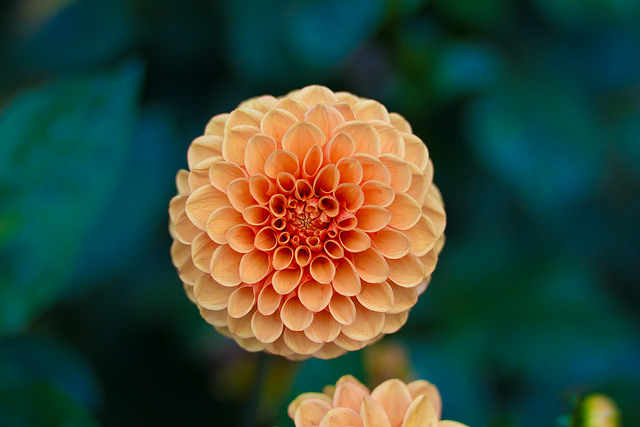

In [ ]:
imgobj = Image.fromarray(img)
imgobj 

In [ ]:
imgobj.save('flower.jpg')

In [ ]:
def load_resize(img_path: Path, resize_to: Tuple[FloatInt, FloatInt]) -> NDArray:
    """Loads an image and resizes it and returns an array

    Parameters
    ----------
    img_path : Path
        _description_
    resize_to : Iterable[FloatInt, FloatInt]
        _description_
    """
    if not isinstance(img_path, Path):
        img_path = Path(img_path)
    
    img_obj = Image.open(img_path)
    img_obj = img_obj.resize(resize_to, resample=Image.BILINEAR)
    return np.asarray(img_obj, dtype=np.float32)

In [ ]:
img_new = load_resize('flower.jpg', resize_to=(128, 128))
img_new.shape

(128, 128, 3)

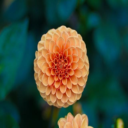

In [ ]:
Image.fromarray(img_new.astype(np.uint8))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()